<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [4]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [6]:
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)

# Add the target as a column named price
cali_df['price'] = cali.target

In [7]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [9]:
cali_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [10]:
# define X and y
X = cali_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
y = cali_df['price']

In [11]:
# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)                                    

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 6), (5160, 6), (15480,), (5160,))

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [14]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

In [15]:
# Initialize the sequential model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

# Add first hidden layer with 24 nodes
model.add(Dense(24, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='linear'))

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [17]:
model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [19]:
history = model.fit(X_train_sc, 
          y_train,
          epochs =100,
          batch_size = 4,
          verbose =0 ,
          validation_data = (X_test_sc, y_test))

In [20]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

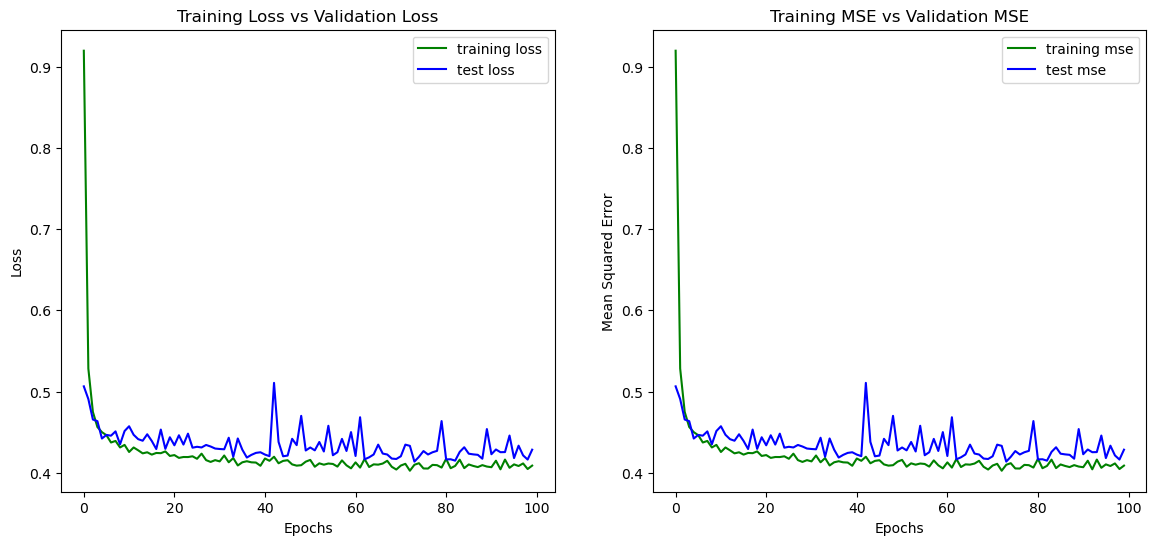

In [22]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], c='g', label = 'training loss')
plt.plot(history.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], c='g', label = 'training mse')
plt.plot(history.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [24]:
# Initialize the sequential model
model1 = Sequential()
model1.add(Input(shape=(6,)))

# Add first hidden layer with 64 nodes
model1.add(Dense(64, activation='relu'))

# Add second hidden layer with 128 nodes
model1.add(Dense(128, activation='relu'))

# Add third hidden layer with 64 nodes
model1.add(Dense(64, activation='relu'))

# Add an output layer
model1.add(Dense(1, activation='linear'))

In [25]:
# compile the model with accuracy 
model1.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse'])

In [26]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,089 (66.75 KB)

 Trainable params: 17,089 (66.75 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
y_train

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: price, Length: 15480, dtype: float64

In [28]:
# fit the model with 10 epochs
result_multi = model1.fit(X_train_sc, y_train, epochs=10, batch_size=32, validation_data=(X_test_sc, y_test))

Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - loss: 1.3779 - mse: 1.3779 - val_loss: 0.4879 - val_mse: 0.4879
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4762 - mse: 0.4762 - val_loss: 0.4661 - val_mse: 0.4661
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.4514 - val_mse: 0.4514
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.4288 - mse: 0.4288 - val_loss: 0.4340 - val_mse: 0.4340
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.4339 - mse: 0.4339 - val_loss: 0.4167 - val_mse: 0.4167
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.4089 - mse: 0.4089 - val_loss: 0.4112 - val_mse: 0.4112
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.4142 - mse: 0.4142 - val_loss: 0.4108 - val_mse: 0.4108
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3934 - mse: 0.3934 - val_loss: 0.4125 - val_mse: 0.4125
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
y_train

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: price, Length: 15480, dtype: float64

In [30]:
print(result_multi.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


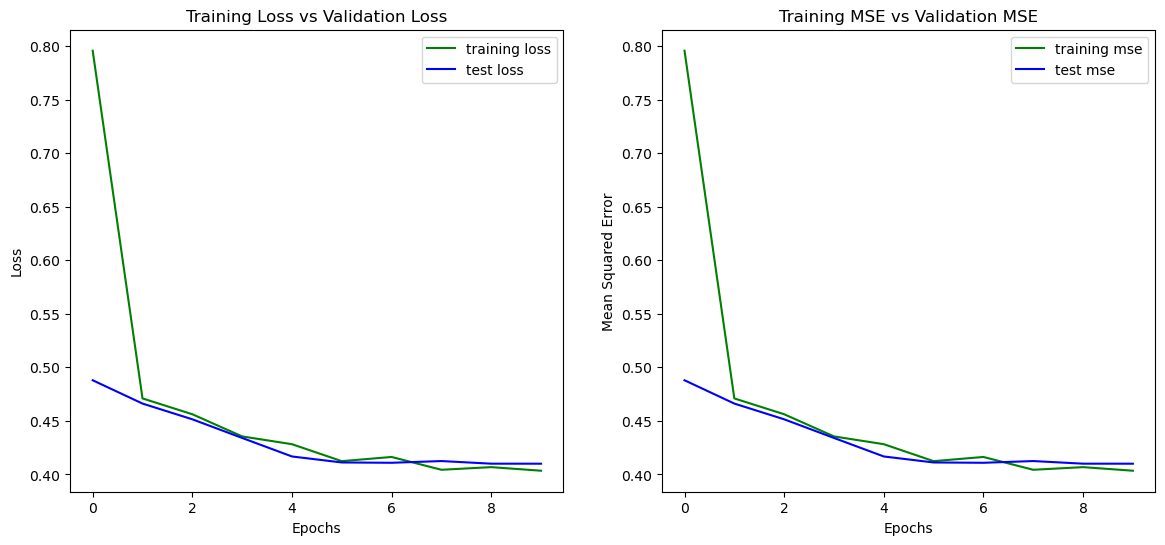

In [31]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(result_multi.history['loss'], c='g', label = 'training loss')
plt.plot(result_multi.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(result_multi.history['mse'], c='g', label = 'training mse')
plt.plot(result_multi.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [34]:
# Initialize the sequential model
model2 = Sequential()
model2.add(Input(shape=(6,)))

model2.add(BatchNormalization())

# Add first hidden layer with 64 nodes
model2.add(Dense(64, activation='relu'))

# Add second hidden layer with 128 nodes
model2.add(Dense(128, activation='relu'))

# Add third hidden layer with 64 nodes
model2.add(Dense(64, activation='relu'))

# Add an output layer
model2.add(Dense(1, activation='linear'))

In [35]:
# compile the model with accuracy 
model2.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse'])

In [36]:
# fit the model with 10 epochs
result_multi2 = model2.fit(X_train_sc, y_train, epochs=10, batch_size=32, verbose =0, validation_data=(X_test_sc, y_test))

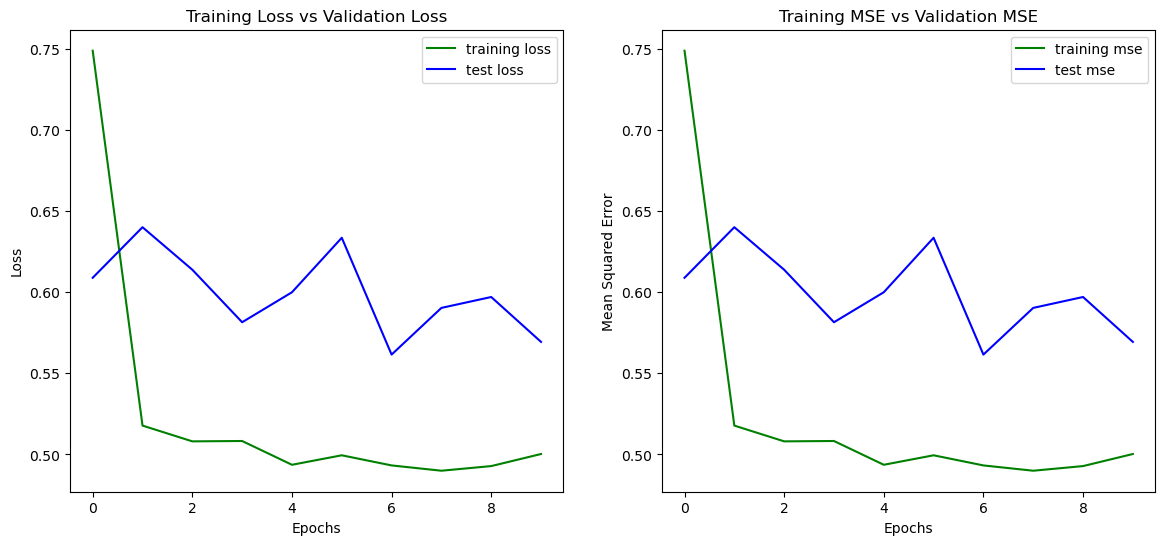

In [37]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(result_multi2.history['loss'], c='g', label = 'training loss')
plt.plot(result_multi2.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(result_multi2.history['mse'], c='g', label = 'training mse')
plt.plot(result_multi2.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5)

# Train the model with EarlyStopping
result1 = model2.fit(
    X_train_sc, y_train, 
    epochs=100, 
    batch_size=32, 
    verbose=0, 
    validation_data=(X_test_sc, y_test), 
    callbacks=[early_stopping])

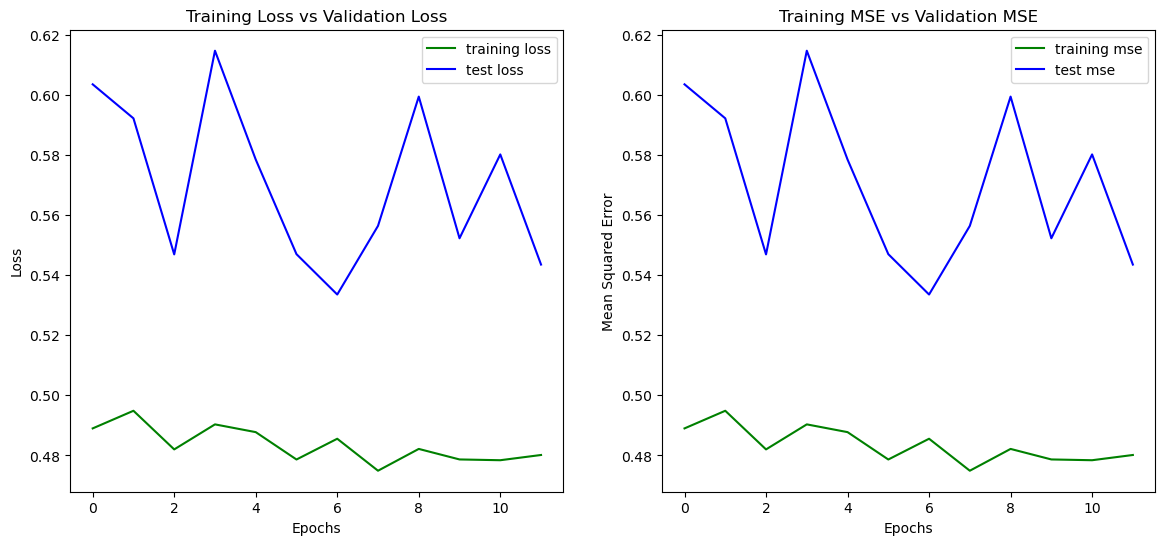

In [40]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(result1.history['loss'], c='g', label = 'training loss')
plt.plot(result1.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(result1.history['mse'], c='g', label = 'training mse')
plt.plot(result1.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

**How many epochs do you think are appropriate?**

6 epochs as it has the lowest loss value

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [44]:
# Initialize the sequential model
model3 = Sequential()
model3.add(Input(shape=(6,)))

# Add first hidden layer with 64 nodes
model3.add(Dense(64, activation='relu'))

# Add second hidden layer with 128 nodes
model3.add(Dense(128, activation='relu'), Dropout(0.05))

# Add third hidden layer with 64 nodes
model3.add(Dense(64, activation='relu'), Dropout(0.2))

# Add an output layer
model3.add(Dense(1, activation='linear'))

In [45]:
# compile the model with accuracy 
model3.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse'])

In [46]:
# fit the model 
result_multi3 = model3.fit(X_train_sc, y_train, epochs=10, batch_size=32, verbose =0, validation_data=(X_test_sc, y_test))

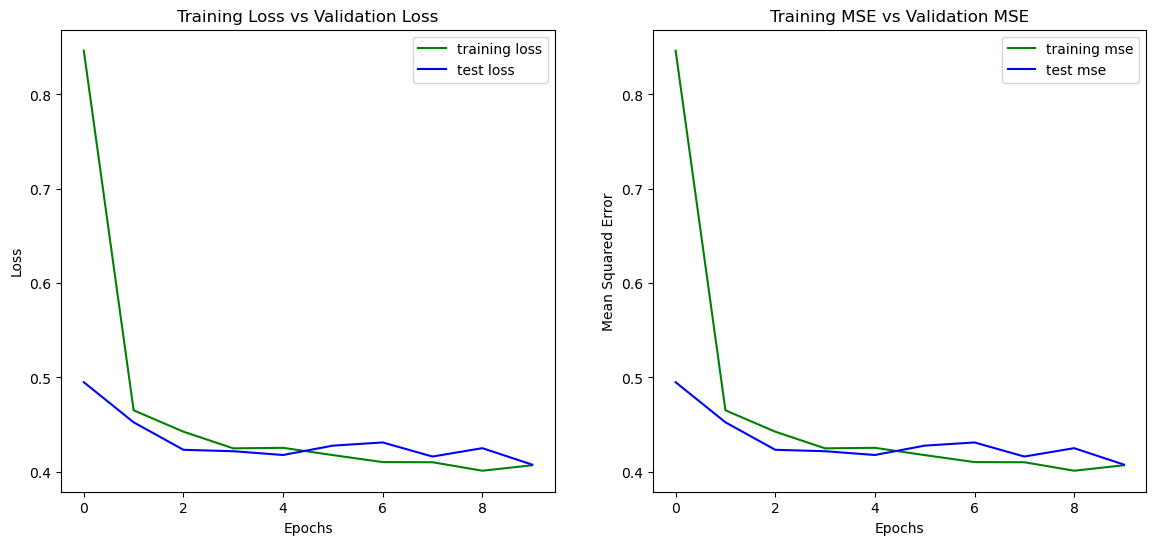

In [47]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(result_multi3.history['loss'], c='g', label = 'training loss')
plt.plot(result_multi3.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(result_multi3.history['mse'], c='g', label = 'training mse')
plt.plot(result_multi3.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [49]:
from sklearn.metrics import root_mean_squared_error

# baseline prediction
y_pred_baseline = model.predict(X_test_sc)

# Optimized Model Predictions
y_pred_optimized = model1.predict(X_test_sc)

# Calculate RMSE for both models
rmse_baseline = np.sqrt(root_mean_squared_error(y_test, y_pred_baseline))
rmse_optimized = np.sqrt(root_mean_squared_error(y_test, y_pred_optimized))

# Compare the results
print(f"RMSE of Baseline Model: {rmse_baseline}")
print(f"RMSE of Optimized Model: {rmse_optimized}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
RMSE of Baseline Model: 0.809088487748384
RMSE of Optimized Model: 0.8001923574442844


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [51]:
# Initialize the sequential model
model4 = Sequential()
model4.add(Input(shape=(6,)))

# Add first hidden layer with 64 nodes
model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add second hidden layer with 128 nodes
model4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

# Add third hidden layer with 64 nodes
model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add an output layer
model4.add(Dense(1, activation='linear'))

In [52]:
# compile the model with accuracy 
model4.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse'])

In [53]:
# fit the model 
result_multi4 = model4.fit(X_train_sc, y_train, epochs=10, batch_size=32, verbose =0, validation_data=(X_test_sc, y_test))

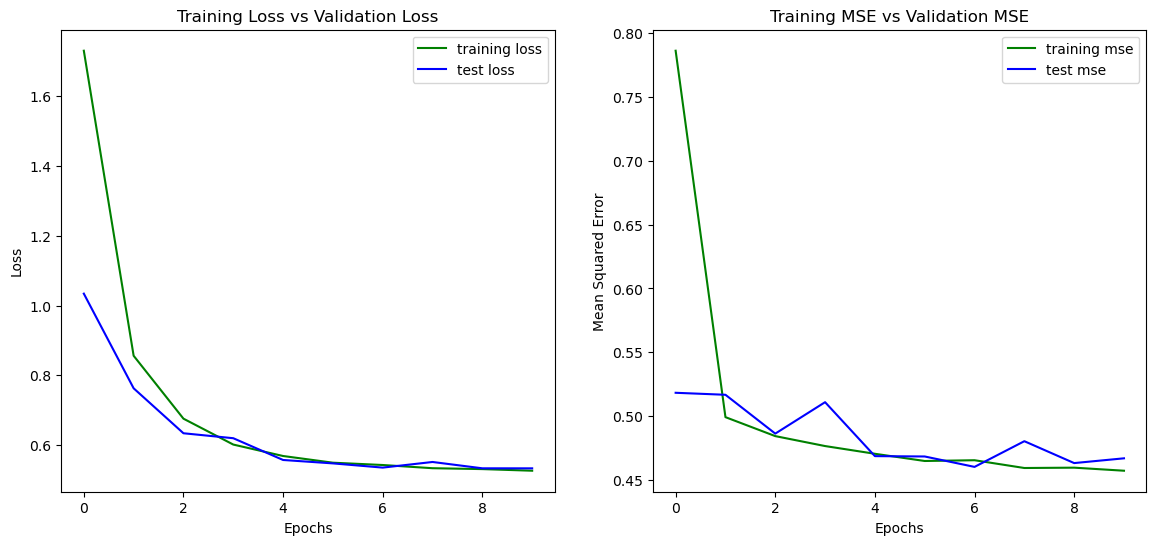

In [54]:
plt.figure(figsize=(14, 6))

# Training loss vs validation loss
plt.subplot(1, 2, 1)
plt.plot(result_multi4.history['loss'], c='g', label = 'training loss')
plt.plot(result_multi4.history['val_loss'], c='b', label ='test loss')
plt.legend();
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training mean squared error vs validation mean squared error
plt.subplot(1, 2, 2)
plt.plot(result_multi4.history['mse'], c='g', label = 'training mse')
plt.plot(result_multi4.history['val_mse'], c='b', label ='test mse')
plt.legend();
plt.title('Training MSE vs Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend();

### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [56]:
from tensorflow.keras.models import save_model
# model3.save('cali_df.h5')
# model3.save('cali_df.keras')
save_model(model4,'./cali_df.keras')